
<p><img alt="udeA logo" height="120px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="10px" vspace="0px" style="width:107px;height:152px;"></p>

# <center> <font color='0B5345'>Homework 3.3:</font> <br> PageRank </center>

## TASK: T1

###  I. sign in with grader

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
init.course_id = "LOGICA_3.v1"
# init.course_id = "bigdata.v2"
import inspect
from local.lib.rlxmoocapi import session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L03.03", varname="student");

logging in as estiven.carmona@udea.edu.co... please wait
using course session LOGICA_3.v1::2023.2
success!! you are logged in


### II. Add your solution

<p>To read documentation about the package <em>networkx</em>, you can see the network analysis in Python <a href="https://networkx.org/documentation/stable/tutorial.html"> Click</a> </p>

In [ ]:
def my_solution_t1():
  import matplotlib.pyplot as plt
  import networkx as nx
  import numpy as np
  import pandas as pd


  class WebMatrix:
      def __init__(self):
          self._G        = nx.DiGraph()                                            # create an empty graph.
          self._n        = 0                                                       # number of Web pages.
          self._edges    = 0                                                       # number of outgoing edges in the Web.
          self._my_dict  = {}                                                      # it stores every web page after assigning an idx per page.
          self._df_matrix = pd.DataFrame(columns=['src','dest','probability'])      # create sparse Matrix  M as a Dataframe
          self._dead_edges = pd.DataFrame(columns=['src','dest','probability'])     # It contains Dead Edges that will be deleted by the DropDeadEnd method.
          self._dead_ends = []                                                      # it contains DeadEnd nodes in the same order that will be deleted by the DropDeadEnd method.
          self._all_dead_ends = []
          return

      def add_nodes(self,nodes):                                                  # nodes is a list storing the graph nodes.
          self._G.add_nodes_from(nodes)
          self._n = self._G.number_of_nodes()
          return self._n

      def add_edges(self,edges):                                                 # edges is a list storing tuples like ("page-x","page-y")
          self._G.add_edges_from(edges)
          self._edges =  self._G.number_of_edges()
          return self._edges

      def find_degree_of_nodes(self):
          dead_ends = []                                                         # the list contains the DeadEnd nodes
          degrees = np.zeros(len(list(self._G.nodes())))
          nodes = list(self._G.nodes())
          for i in range(len(nodes)):
              degrees[i] = len(list(self._G.out_edges(nodes[i])))
              if degrees[i] == 0 :
                dead_ends.append(list(self._G.nodes())[i])                        # add new DeadEnd node.
          return degrees, dead_ends

      def build_matrix(self, degrees):
          edges = list(self._G.edges())                                           # this list stores all Web edges
          nodes = list(self._G.nodes())
          for i in range(len(nodes)):
              self._my_dict[nodes[i]] = i                                         # assign id i to each Web page
          for item in range(len(edges)):
              if degrees[self._my_dict[edges[item][0]]]  != 0 :
                dest = edges[item][1]                                            # destination Web page in the edge
                src  = edges[item][0]                                            # source Web page in th edge
                self._G[src][dest]['prob'] =  (1 / degrees[self._my_dict[edges[item][0]]])      # compute probability to select "dest" from "src"
                self._df_matrix = self._df_matrix.append({'src':src, 'dest':dest, 'probability': (1 / degrees[self._my_dict[edges[item][0]]])}, ignore_index= True)
          return self._df_matrix

      def view(self):                                                            # plot the Web Graph
          nx.draw(self._G, with_labels=True, font_color='blue', node_color="yellow", edgecolors="blue", font_size=8,  node_size= 900, font_weight="bold")
          return

      def drop_dead_ends(self):
        ### START YOUR CODE HERE
        """
        degrees, dead_ends = self.find_degree_of_nodes()
        while len(dead_ends) != 0:
          for node in dead_ends:
            dead_edges = list(self._G.in_edges(node))
            self._G.remove_node(node)
            self._G.remove_edges_from(dead_edges)
            self._dead_ends.append(node)
            self._df_matrix = self._df_matrix[~((self._df_matrix['dest'] == node) | (self._df_matrix['src'] == node))]
            for src, dest, prob in self._df_matrix[self._df_matrix['dest'] == node].itertuples(index=False):
                new_dead_edge = self._df_matrix.loc[(self._df_matrix['src'] == src) & (self._df_matrix['dest'] == dest)]
                self._dead_edges = pd.concat([self._dead_edges, new_dead_edge], ignore_index=True)
            dead_ends.remove(node)
            degrees, dead_ends = self.find_degree_of_nodes()
        all = self._df_matrix.groupby("src").count()
        self._df_matrix['probability'] = 1 / all.loc[self._df_matrix['src'], 'dest'].values
        self._df_matrix = self._df_matrix.reset_index(drop=True)
        """
        degree, self._dead_ends = self.find_degree_of_nodes()
        nodes = list(self._G.nodes())
        while len(self._dead_ends) != 0:
           deadEnd = self._dead_ends.pop()
           deadEdges = list(self._G.in_edges(deadEnd))
           self._G.remove_node(deadEnd)
           self._all_dead_ends.append(deadEnd)
           self._G.remove_edges_from(deadEdges)
           for edge in deadEdges:
              src = edge[0]
              dest = edge[1]
              new_deadEdge = self._df_matrix.loc[(self._df_matrix["src"] == src) & (self._df_matrix["dest"] == dest)]
              self._dead_edges = pd.concat([self._dead_edges, new_deadEdge], ignore_index= True)
              self._df_matrix.drop(new_deadEdge.index[0], inplace=True)
           degree, self._dead_ends=self.find_degree_of_nodes()
        counts = self._df_matrix.groupby('src').count()
        self._df_matrix['probability'] = 1 / counts.loc[self._df_matrix['src'], 'dest'].values
        self._df_matrix = self._df_matrix.reset_index(drop=True)
        #### END YOUR CODE HERE
        return self._df_matrix , self._all_dead_ends

      def taxation(self, beta, epsilon):
        #### START YOUR CODE HERE
        #self._page_rank_vector = pd.DataFrame({ "node": list(self._G.nodes()), "value": 1/len(self._G.nodes())})
        nodes = list(self._G.nodes())
        n = len(self._G.nodes())
        df_vi = pd.DataFrame({'src': nodes, 'value': [1/n]*n})
        pr_cercano = False
        tolerance = 0.001
        while not pr_cercano:
           self._page_rank_vector = df_vi.copy()
           df_M = self._df_matrix.copy()
           df_M['probability'] = df_M['probability'] * beta
           probDist = pd.merge(df_M, df_vi, on="src", how="inner")
           probDist['probability'] = probDist['probability'] * probDist['value']
           probDist = probDist.groupby('dest').sum()
           df_p = pd.DataFrame(probDist['probability'])
           df_vi.update(pd.DataFrame({'value': [x[0] + (1-beta)/n for x in df_p.values]}))
           vi_1 = df_vi['value'].values
           vi = self._page_rank_vector['value'].values
           pr_cercano = np.allclose(vi_1, vi, atol=tolerance)
        self._page_rank_vector = df_vi.copy()
        self._page_rank_vector = self._page_rank_vector.rename(columns={'src':'node'})
        #### END YOUR CODE HERE
        return self._page_rank_vector                                        # is is a dataframe with columns ['node' , 'value']

      def page_rank(self):
        #### START YOUR CODE HERE
        if len(self._all_dead_ends) != 0:
          self._all_dead_ends = self._all_dead_ends[::-1]
          for node in self._all_dead_ends:
            pr_node = 0
            node_edges = self._dead_edges[self._dead_edges['dest'] == node].values
            for edge in node_edges:
              node_in = edge[0]
              prob = edge[2]
              pr_node_in = self._page_rank_vector.loc[self._page_rank_vector['node'] == node_in, 'value'].values[0]
              pr_node += (pr_node_in * prob)
            new_row = pd.DataFrame({'node': [node], 'value': [pr_node]})
            self._page_rank_vector = pd.concat([self._page_rank_vector, new_row], ignore_index=True)
        self._page_rank_vector = self._page_rank_vector.sort_values(by='node').reset_index(drop=True)
        #### END YOUR CODE HERE
        return self._page_rank_vector
                                                                           # it  stores the PageRank for every Web page and columns ['node' , 'value']
  return WebMatrix()

In [ ]:
epsilon = 1e-6         # you must define an epsilon

<font color='0B5345' ><b>Step 1:</b></font> Write the procedure *DropDeadEnds*.  <br><em>Input:</em> the Matrix $M$. <br> <em>Output: </em>self._dfMatrix contains no DeadEnds nodes whereas  self._FullDeads contains DeadEnds nodes


<img src="https://github.com/freddyduitama/images/blob/master/web-4.png?raw=true"  align="left" height="180" width="400">

\begin{align*}
M =
\left[
    \begin{array}{cccc}
     0 & 1/3 & 1/3 & 1/3 & 0 \\
    1/2 & 0 & 0 & 1/2 & 0 \\
    0 & 0 & 0 & 0 & 1\\
    0 & 1/2 & 1/2 & 0  & 0\\
    0 & 0 & 0 & 0  & 0\\
    \end{array}
  \right]
\end{align*}
<br><br>
<caption><font color='0B5345'> <b>&emsp;&emsp;&emsp;&emsp; <u> Figure 1-a:</u>  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; <u>Figure 1-b:</u></b> &emsp;&emsp;&emsp;&emsp;<br> &emsp;&emsp; G: graph with dead ends &emsp;&emsp; G': dropping dead ends.</font>&emsp;&emsp;  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;</caption>



In [ ]:
# add this method to tha class WebMatrix
def drop_dead_ends(self):                                                 # parameter: A WebMatrix object.
  """
  Delete nodes  with pages that have no out-links to other pages.
  Besides it updates the probability between nodes when they have out edges toward the Dead Ends.
  INPUT:
  """
  degree, self._dead_ends = self.find_degree_of_nodes()
  nodes = list(self._G.nodes())
  while len(self._dead_ends) != 0:
      deadEnd = self._dead_ends.pop()
      deadEdges = list(self._G.in_edges(deadEnd))
      self._G.remove_node(deadEnd)
      self._all_dead_ends.append(deadEnd)
      self._G.remove_edges_from(deadEdges)
      for edge in deadEdges:
        src = edge[0]
        dest = edge[1]
        new_deadEdge = self._df_matrix.loc[(self._df_matrix["src"] == src) & (self._df_matrix["dest"] == dest)]
        self._dead_edges = pd.concat([self._dead_edges, new_deadEdge], ignore_index= True)
        self._df_matrix.drop(new_deadEdge.index[0], inplace=True)
      degree, self._dead_ends=self.find_degree_of_nodes()
  counts = self._df_matrix.groupby('src').count()
  self._df_matrix['probability'] = 1 / counts.loc[self._df_matrix['src'], 'dest'].values
  self._df_matrix = self._df_matrix.reset_index(drop=True)
    #### END YOUR CODE HERE
  return self.df_matrix, self._dead_ends                            # Web._df_matrix contains no dead_ends nodes, Web._dead_ends contains dead_ends nodes

<font color='0B5345' ><b>Step 2:</b></font> Write the procedure called <em>Taxation.</em>
$\vec v_{i+1} = \beta M' \vec v_i' + (1 - \beta ) \frac {\vec e'}{n} \tag{1}$

<a>Hint:</a>
<font size="2">
<ul align="justify">
<li>You can use Pandas DataFrames to represent both the sparse Web matrix and the vector. See Fig. $2$.</li>
<li>You can use the join operation df_P = pd.merge(df_M, df_N, on=<font color="green">"j"</font>, how=<font color="green">"inner"</font>). </li>
<li>You can use the following sentence: df_P = df_P.groupby(<font color="green">'i'</font>).sum()</li>
</ul>
<center><img src="https://github.com/freddyduitama/images/blob/master/page-rank1.png?raw=true"  height="200" width="520"></center>
<caption><center><font color='0B5345'> <u> <b>Figure 2:</b><br> </u>Matrix as Pandas DataFrame.</font></center></caption>   

In [ ]:
# add this method to class WebMatrix
def tacation(self, beta, epsilon):
      #### START YOUR CODE HERE
      nodes = list(self._G.nodes())
      n = len(self._G.nodes())
      df_vi = pd.DataFrame({'src': nodes, 'value': [1/n]*n})
      pr_cercano = False
      tolerance = 0.001
      while not pr_cercano:
          self._page_rank_vector = df_vi.copy()
          df_M = self._df_matrix.copy()
          df_M['probability'] = df_M['probability'] * beta
          probDist = pd.merge(df_M, df_vi, on="src", how="inner")
          probDist['probability'] = probDist['probability'] * probDist['value']
          probDist = probDist.groupby('dest').sum()
          df_p = pd.DataFrame(probDist['probability'])
          df_vi.update(pd.DataFrame({'value': [x[0] + (1-beta)/n for x in df_p.values]}))
          vi_1 = df_vi['value'].values
          vi = self._page_rank_vector['value'].values
          pr_cercano = np.allclose(vi_1, vi, atol=tolerance)
      self._page_rank_vector = df_vi.copy()
      self._page_rank_vector = self._page_rank_vector.rename(columns={'src':'node'})
        ## END YOUR CODE HERE
      return self._page_rank_vector                                         # dataframe with columns ['node' , 'value']

<font color='0B5345' ><b>Step 3:</b></font> Write the procedure  for computing the PageRank to pages that have been dropped in step 1, do it in the order opposite to that in which they were deleted.

<center><img src="https://github.com/freddyduitama/images/blob/master/web-5.png?raw=true"  height="200" width="220"></center><br>
<caption><center><font color='0B5345'> <u> <b>Figure 3:</b><br> </u>Calculing pageRank for Dead ends.</font></center></caption>    

In [ ]:
# add this method to class WebMatrix
def page_rank(self):
        #### START YOUR CODE HERE
    if len(self._all_dead_ends) != 0:
      self._all_dead_ends = self._all_dead_ends[::-1]
      for node in self._all_dead_ends:
        pr_node = 0
        node_edges = self._dead_edges[self._dead_edges['dest'] == node].values
        for edge in node_edges:
          node_in = edge[0]
          prob = edge[2]
          pr_node_in = self._page_rank_vector.loc[self._page_rank_vector['node'] == node_in, 'value'].values[0]
          pr_node += (pr_node_in * prob)
        new_row = pd.DataFrame({'node': [node], 'value': [pr_node]})
        self._page_rank_vector = pd.concat([self._page_rank_vector, new_row], ignore_index=True)
    self._page_rank_vector = self._page_rank_vector.sort_values(by='node').reset_index(drop=True)
        ## END YOUR CODE HERE
    return  self._page_rank_vector

### III. Test your solution:  <b>Case 1</b>

In [1]:
# This code build the graph and the Web Matrix
Web = my_solution_t1()                                                #create the object WebMatrix
nodes = ["page-1","page-2","page-3","page-4"]
nodes = Web.add_nodes(nodes)
edges = Web.add_edges([("page-1","page-2"), ("page-1","page-3"),("page-1","page-4"), ("page-2","page-1"),("page-2","page-4"),("page-3","page-1"),("page-4","page-2"),("page-4","page-3")])

degree, dead_ends = Web.find_degree_of_nodes()
df=Web.build_matrix(degree)

print("Number of Nodes ", nodes)
print("Number of Edges ", edges)
print("degree per page ", Web.find_degree_of_nodes())
print("          Web Matrix ")
df

NameError: ignored

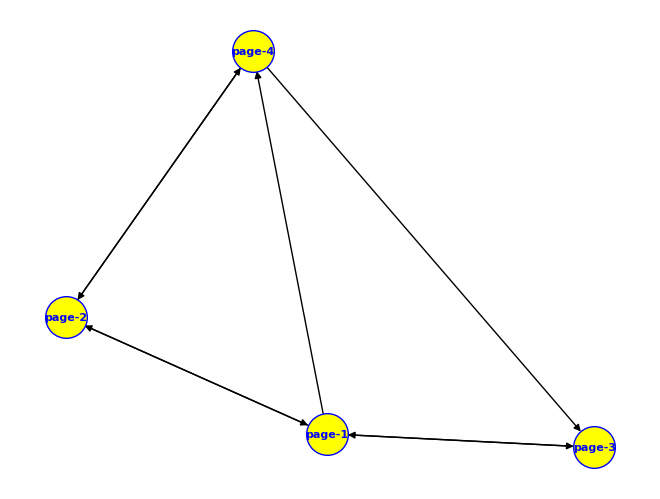

In [ ]:
Web.view()

In [ ]:
Web.drop_dead_ends()

(      src    dest  probability
 0  page-1  page-2     0.333333
 1  page-1  page-3     0.333333
 2  page-1  page-4     0.333333
 3  page-2  page-1     0.500000
 4  page-2  page-4     0.500000
 5  page-3  page-1     1.000000
 6  page-4  page-2     0.500000
 7  page-4  page-3     0.500000,
 [])

In [ ]:
Web.taxation(0.8, epsilon)

<ipython-input-53-4bf1749deb44>:112: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  probDist = probDist.groupby('dest').sum()
<ipython-input-53-4bf1749deb44>:112: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  probDist = probDist.groupby('dest').sum()
<ipython-input-53-4bf1749deb44>:112: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  probDist = probDist.groupby('dest').sum()
<ipython-input-53-4bf1749deb44>:112: FutureWarnin

,node,value
0,page-1,0.321546
1,page-2,0.226151
2,page-3,0.226151
3,page-4,0.226151


In [ ]:
Web.page_rank()

,node,value
0,page-1,0.321546
1,page-2,0.226151
2,page-3,0.226151
3,page-4,0.226151


Answer  Case 1

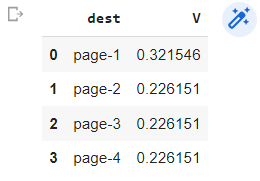



### IV. Test your solution: <b> Case 2</b>


In [ ]:
# This code build the graph and the Web Matrix
Web = my_solution_t1()                                                #create the object WebMatrix
nodes = ["page-1","page-2","page-3","page-4","page-5"]
nodes = Web.add_nodes(nodes)
edges = Web.add_edges([("page-1","page-2"), ("page-1","page-3"),("page-1","page-4"), ("page-2","page-1"),("page-2","page-4"),("page-3","page-5"),("page-4","page-2"),("page-4","page-3")])


degree, dead_ends = Web.find_degree_of_nodes()
df=Web.build_matrix(degree)

print("Number of Nodes ", nodes)
print("Number of Edges ", edges)
print("degree per page ", Web.find_degree_of_nodes())
print("          Web Matrix ")
df

Number of Nodes  5
Number of Edges  8
degree per page  (array([3., 2., 1., 2., 0.]), ['page-5'])
          Web Matrix 


<ipython-input-53-4bf1749deb44>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._df_matrix = self._df_matrix.append({'src':src, 'dest':dest, 'probability': (1 / degrees[self._my_dict[edges[item][0]]])}, ignore_index= True)
<ipython-input-53-4bf1749deb44>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._df_matrix = self._df_matrix.append({'src':src, 'dest':dest, 'probability': (1 / degrees[self._my_dict[edges[item][0]]])}, ignore_index= True)
<ipython-input-53-4bf1749deb44>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._df_matrix = self._df_matrix.append({'src':src, 'dest':dest, 'probability': (1 / degrees[self._my_dict[edges[item][0]]])}, ignore_index= True)
<ipython-input-53-4bf1749deb44>:50: FutureW

,src,dest,probability
0,page-1,page-2,0.333333
1,page-1,page-3,0.333333
2,page-1,page-4,0.333333
3,page-2,page-1,0.500000
4,page-2,page-4,0.500000
5,page-3,page-5,1.000000
6,page-4,page-2,0.500000
7,page-4,page-3,0.500000


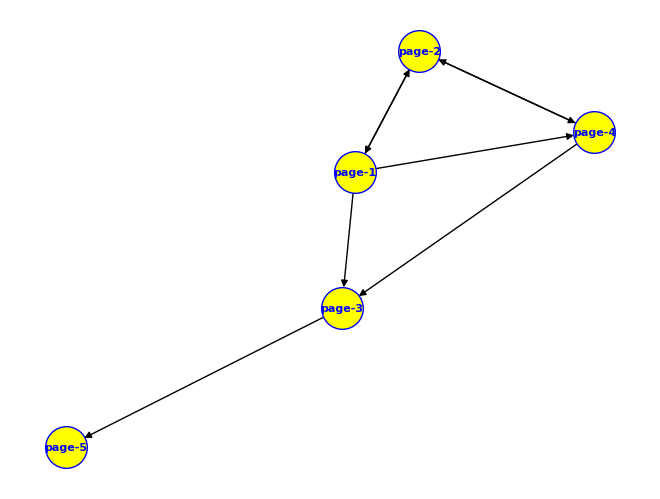

In [ ]:
Web.view()

In [ ]:
Web.drop_dead_ends()

(      src    dest  probability
 0  page-1  page-2          0.5
 1  page-1  page-4          0.5
 2  page-2  page-1          0.5
 3  page-2  page-4          0.5
 4  page-4  page-2          1.0,
 ['page-5', 'page-3'])

In [ ]:
Web.taxation(0.8, epsilon)

<ipython-input-53-4bf1749deb44>:112: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  probDist = probDist.groupby('dest').sum()
<ipython-input-53-4bf1749deb44>:112: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  probDist = probDist.groupby('dest').sum()
<ipython-input-53-4bf1749deb44>:112: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  probDist = probDist.groupby('dest').sum()
<ipython-input-53-4bf1749deb44>:112: FutureWarnin

,node,value
0,page-1,0.237939
1,page-2,0.428727
2,page-4,0.333333


In [ ]:
print(Web.page_rank())

     node     value
0  page-1  0.237939
1  page-2  0.428727
2  page-3  0.245980
3  page-4  0.333333
4  page-5  0.245980


### VI. Test your solution: <b>case 3</b>

In [ ]:
# This code build the graph and the Web Matrix
Web = my_solution_t1()                                                #create the object WebMatrix
nodes = ["page-1","page-2","page-3","page-4"]
nodes = Web.add_nodes(nodes)
edges = Web.add_edges([("page-1","page-2"), ("page-1","page-3"),("page-1","page-4"), ("page-2","page-1"),("page-2","page-4"),("page-3","page-3"),("page-4","page-2"),("page-4","page-3")])

degree, DeadEnds = Web.find_degree_of_nodes()
df=Web.build_matrix(degree)

print("Number of Nodes ", nodes)
print("Number of Edges ", edges)
print("degree per page ", Web.find_degree_of_nodes())
print("          Web Matrix ")
df

Number of Nodes  4
Number of Edges  8
degree per page  (array([3., 2., 1., 2.]), [])
          Web Matrix 


<ipython-input-53-4bf1749deb44>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._df_matrix = self._df_matrix.append({'src':src, 'dest':dest, 'probability': (1 / degrees[self._my_dict[edges[item][0]]])}, ignore_index= True)
<ipython-input-53-4bf1749deb44>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._df_matrix = self._df_matrix.append({'src':src, 'dest':dest, 'probability': (1 / degrees[self._my_dict[edges[item][0]]])}, ignore_index= True)
<ipython-input-53-4bf1749deb44>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._df_matrix = self._df_matrix.append({'src':src, 'dest':dest, 'probability': (1 / degrees[self._my_dict[edges[item][0]]])}, ignore_index= True)
<ipython-input-53-4bf1749deb44>:50: FutureW

,src,dest,probability
0,page-1,page-2,0.333333
1,page-1,page-3,0.333333
2,page-1,page-4,0.333333
3,page-2,page-1,0.500000
4,page-2,page-4,0.500000
5,page-3,page-3,1.000000
6,page-4,page-2,0.500000
7,page-4,page-3,0.500000


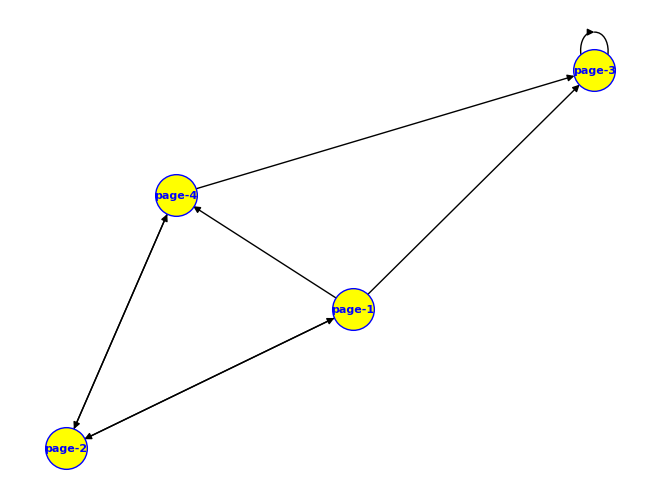

In [ ]:
Web.view()

In [ ]:
Web.drop_dead_ends()

(      src    dest  probability
 0  page-1  page-2     0.333333
 1  page-1  page-3     0.333333
 2  page-1  page-4     0.333333
 3  page-2  page-1     0.500000
 4  page-2  page-4     0.500000
 5  page-3  page-3     1.000000
 6  page-4  page-2     0.500000
 7  page-4  page-3     0.500000,
 [])

In [ ]:
Web.taxation(0.8, epsilon)

<ipython-input-53-4bf1749deb44>:112: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  probDist = probDist.groupby('dest').sum()
<ipython-input-53-4bf1749deb44>:112: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  probDist = probDist.groupby('dest').sum()
<ipython-input-53-4bf1749deb44>:112: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  probDist = probDist.groupby('dest').sum()
<ipython-input-53-4bf1749deb44>:112: FutureWarnin

,node,value
0,page-1,0.101613
1,page-2,0.128760
2,page-3,0.640867
3,page-4,0.128760


In [ ]:
Web.page_rank()

,node,value
0,page-1,0.101613
1,page-2,0.128760
2,page-3,0.640867
3,page-4,0.128760


### VII. Submit your solution to the grader

In [ ]:
## TEACHER
student.submit_task(globals(), task_id="T1");




## TASK: T2.

<p align="justify"> <p align="justify"> <font face="Verdana" size="2.5">
<center><img src="https://github.com/freddyduitama/images/blob/master/web-4.png?raw=true"  height="200" width="450"></center><br>
<caption><center><font color='0B5345'> <b> <u> Figure 4-a:</u>  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; <u>Figure 4-b:</u></b> &emsp;&emsp;&emsp;&emsp;<br> &emsp;&emsp;&emsp;&emsp; G: graph with dead ends &emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; &emsp; G': dropping dead ends.</font>&emsp;&emsp;  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;</center></caption> </font>
<ol> <font face="Verdana" size="2.5">
<li>A random surfer can decide to return to the previous page using the backwarding option. How should you modify the equation (3) to include this probability in the PageRank equation? </li>
<li>Compute the PageRank of each page in Fig. 4.b. Assume no taxation. </li>
<li>Compute the PageRank of each page in Fig. 4.b. Use taxation, assume $\beta = 0.9$. </li>  
<li>In example 2, suggest and explain another possible strategy to avoid dead ends without deleting them from the graph.  </li>
</ol>

</p>